# Project Title
### Data Engineering Capstone Project

#### Project Summary
<font color='red'>This project utilizes Spark, S3, and Redshift to load, extract and transform data about immigration to the U.S. This project will combine what the lessons and skills gained throughout the program. <br>
    At a high level, this project preprocesses the immigration and supporting data using PySpark and staging it into S3. From S3, the data is staged into Redshift and then transformed into fact and dimension tables. Finally, data quality checks are performed to ensure the entire pipeline ran correctly.

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc> <br>
<font color='red'>
    This project will load in data from the SAS files containing I94 immigration data, temperatures by city data, demographic data, and airport data. Other data used in this project is the information from the i94 description file. Each of these datasets are preprocessed and cleaned in order to be loaded into S3. Once the data is loaded into S3 the data is then copied into Redshift in staging tables. Once the staging tables are loaded into Redshift, the data is then extracted and transformed to create the fact and dimension tables. The data ends in the Redshift database to be used and accessed for further analysis. Besides Pyspark, S3, and Redshift, other tools used in this project are Jupyter Notebooks and AWS Console.
    </font>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

<font color='red'>
<h3>The main dataset will include data on immigration to the United States, and supplementary datasets will include data on airport codes, U.S. city demographics, and temperature data. The data sets include the following: 

<font color='red'>

<h4>I94 Immigration Data</h4><br>
    This data comes from the US National Tourism and Trade Office. This data is stored as a set of SAS7BDAT files. SAS7BDAT is a database storage file created by Statistical Analysis System (SAS) software to store data. A separate SAS file `I94_SAS_Labels_Descriptions.SAS` is also provided to describe the data found in the source data. This description also provides the port and country codes mapped to the decoded strings. This data is the source of most of the data in the data model and represents 12 months of data for the year 2016. <br>
This data is initially processed using spark. 

 <font color='red'>
    <h4>World Temperature Data</h4><br>
    This CSV dataset contains the recorded temperatures by city from 1743-11-01 to 2013-09-01. In order to select temperatures that were relevant to our dataset, I chose the most recent recording of each city by sorting and dropping duplicates.

<font color="red">
<h4>U.S. City Demographic Data</h4><br>
    This CSV data contains information about the demographics of the U.S. This data will support the port data to gather more information about the demographic at each port

<font color="red">

<h4>Airport Code Table</h4><br>
    This is a simple CSV table of airport codes and corresponding cities


### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

<font color='red'><b>
Preprocessing and data cleaning are performed in `preprocessing.py` and included in the data pipeline `pipeline.py`
<br><br>
A total of 6 data sets were cleaned, processed, and written to S3. <br>
The following functions were used to clean and process each of the 6 datasets: 
    <ol type = "1">
         <li>`process_port_codes` Process the port codes, city, and state found in I94_SAS_Labels_Descriptions.SAS </li>
         <li>`process_country_codes` Process the country codes and respective countries found in I94_SAS_Labels_Descriptions.SAS</li>
         <li>`process_airport_codes` Process airport data found in data/raw_data/airport-codes_csv</li>
         <li>`process_temperature` Process temperature data found in data/raw_data/GlobalLandTemperaturesByCity.csv, clean column names, and choose most recent average temperatures</li>
         <li>`process_demographic` Process demographic data found in data/raw_data/us-cities-demographics.csv and clean column names</li>
         <li>`process_immigration_data`</li> from 2016 found in ../../data/18-83510-I94-Data-2016/, decode visa types, modes, and datetimes
      </ol>
</b></font>

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

In [10]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size
        
    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

<font color='red'>
    For this project I used a snowflake schema which has one fact table with multiple dimension tables to support the fact table data. Since there was one main source of data, the other data was able to support the main source. Below is the data model.

In [11]:
PDF('docs/capstone.pdf',size=(1000,1000))

## Below we will be able to preview the final output and graphically answer the folloing questions:
1. What are the top 10 origin countries of immigrants in 2016?
2. What day of the week are immigrants arriving in the U.S. in 2016?

*Note: the following graphs are saved as a picture in docs/

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

<font color='red'><b>
The necessary steps for the pipeline are performed in `pipeline.py`
<br><br>
The steps performed are: <br>
Preprocess data --> Stage data --> Extract data --> Check Data Quality
    <ol type = "1">
         <li>Preprocess Data `preprocessing.py` : Data is processed from the raw data using Spark and then written to S3 </li>
         <li>Stage Data `stage_data.py` : Data is copied from S3 into Redshift staging tables</li>
         <li>Extract Data `extract_data.py` : Data is extracted from staging tables into fact and dimesion tables</li>
         <li>Check Data Quality `quality_check.py` : Data quality is checked after the extracted data is organized</li>
    </ol>
</b></font>

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

<font color='red'><b>
The data pipeline is created in `pipeline.py`
<br>
To run the pipeline, use the following command in the terminal
<br>
```
python pipeline.py
```

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

<font color='red'>
Test decoding functions from `preprocessing.py`

In [69]:
from preprocessing import decode_i94visa, decode_mode, convert_sas_datetime, get_sas_day
from datetime import datetime

expected_visa = 'Business'
print(f'Decode Visa Passed: {decode_i94visa(1) == expected_visa}')

expected_mode = 'Air'
print(f'Decode Mode Passed: {decode_mode(1) == expected_mode}')

expected_datetime = datetime(2016, 4, 7, 0, 0)
print(f'Convert Time Passed: {convert_sas_datetime(20551) == expected_datetime}')

expected_day = 7
print(f'SAS Day Passed: {get_sas_day(20551) == expected_day}')


Decode Visa Passed: True
Decode Mode Passed: True
Convert Time Passed: True
SAS Day Passed: True


<font color='red'><b>
Data quality Checks are performed in `quality_check.py` and included in the data pipeline `pipeline.py`
<br><br>
The two data quality checks performed were:
    <ol type = "1">
         <li>`count_immigration_staging` This quality check ensures that immigration data has been copied from the S3 buckets into Redshift</li>
         <li>`count_immigration_fact` This quality check ensures that immigration data has been extracted from the staging table into the immigration fact table</li>
      </ol>
</b></font>

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

# Data Dictionary

#### dim_ports <br>

|Field|Type|Description|
|----|-----|-----------|
|port_id|bigint|Primary Key|
|port_code|varchar(3) not null|3 character code used for I94 ports|
|port_city|varchar(256)| U.S. city of port|
|port_state|varchar(50)|U.S. state of port|
|average_temperature|numeric(16,3)|Average temperature of port city|

## dim_countries

|Field|Type|Description|
|----|-----|-----------|
|country_id|int8|Primary Key|
|country_code|varchar(3) not null|3 character code used for I94 countries|
|country|varchar(256) not null|Country from I94 countries|
|average_temperature|numeric(16,3)|Average temperature of country|

## dim_time

|Field|Type|Description|
|----|-----|-----------|
|sas_timestamp|int not null| Primary Key - The SAS timestamp (days since 1/1/1960)|
|year|int not null|4 digit year|
|month|int not null|Month (1-12)|
|day|int not null|Day (1-31)|
|week|int not null|Week of Year (1-52)|
|day_of_week|int not null|Day of Week (1-7) starting on Sunday|
|quarter|int not null|Quarter of Year (1-4)|

## dim_demographics

|Field|Type|Description|
|----|-----|-----------|
|demographics_id|int8|Primary Key|
|port_id|int8|Foreign key to dim_ports|
|median_age|numeric(18,2)|The median age for the demographic|
|male_population|int|Count of male population for city|
|female_population|int|Count of female population for city|
|total_population|bigint|Count of population for city|
|num_of_veterans|int|Count of veterans|
|foreign_born|int|Count of foreign born persons|
|avg_household_size|numeric(18,2)|Average household size in city|
|race|varchar(100)|Race for this demographic|
|demo_count|int|Count for this demographic|

## dim_airports

|Field|Type|Description|
|----|-----|-----------|
|airport_id|int|Primary Key|
|port_id|int|Foreign key to dim_ports|
|airport_type|varchar(256)|Short description of airport type|
|airport_name|varchar(256)|Airport Name|
|elevation_ft|int|Airport elevation|
|municipality|varchar(256)|Airport municipality|
|gps_code|varchar(256)|Airport GPS code|
|iata_code|varchar(256)|Airport International Air Transport Association code|
|local_code|varchar(256)|Airport local code|
|coordinates|varchar(256)|Airport Coordinates|

## fact_immigration

|Field|Type|Description|
|----|-----|-----------|
|immigration_id|bigint|Primary Key|
|country_id|bigint|Foreign key to dim_countries|
|port_id|bigint|Foreign Key to dim_ports|
|age|int|Age of immigrant|
|travel_mode|varchar(100)|Mode of travel for immigrant (air, sea, land, etc.)|
|visa_category|varchar(100)|Immigrant VISA category|
|visa_type|varchar(100)|Type of VISA|
|gender|varchar(10)|Immigrant gender|
|arrdate|int|SAS timestamp of arrival date, Foreign key to dim_time|
|depdate|int|SAS timestamp of departure date, Foreign key to dim_time|

In [15]:
from query_data import load_arrival_day, load_immigrants_by_country
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

data1 = load_immigrants_by_country()
data2 = load_arrival_day()

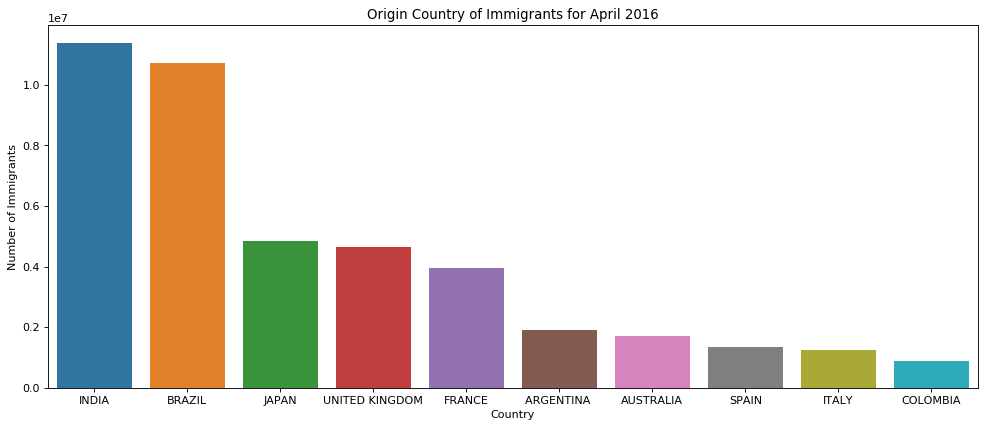

In [16]:
plt.figure(figsize=(15, 6), dpi=80)
plt.title('Origin Country of Immigrants for April 2016')
sns.barplot(x='Country', y='Number of Immigrants', data=data1)

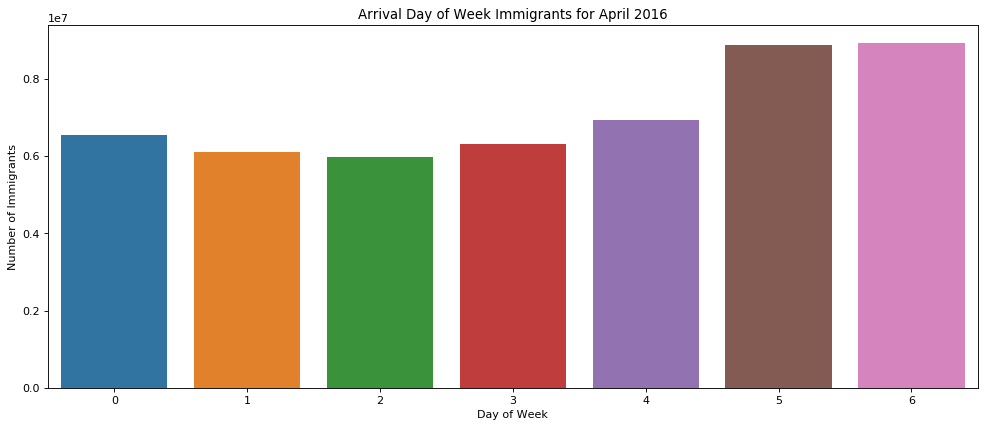

In [14]:
plt.figure(figsize=(15, 6), dpi=80)
plt.title('Arrival Day of Week Immigrants for April 2016')
sns.barplot(x='Day of Week', y='Number of Immigrants', data=data2)

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.

<font color='red'>
    I decided to use PySpark to handle the raw data so that if the data grew, this would still be functional. Pyspark was used to clean and preprocess the data. For the DataLake, I used S3 in order to easily use and interact with Redshift. Once the data was loaded into S3, I used Redshift since it was easily compatible with S3. To run the pipeline, I simply used python to manually run the steps of the pipeline. <br><br> </font>
<font color='red'>
    The intended user of this project would be a Data Scientist interested in exploring immigration data over the years or specific year. This Data Scientist could be working for the government and could use this analysis from this data to present to the government for a better understanding of how many people are migrating to the U.S., how long they are staying, and all of the demographics that surround each person. Perhaps this data scientist is trying to understand which country is the most common origin country and what age the majority of the immigrant population come to the U.S. Another question that could be answered is if there is a certain time of year where the most immigrants travel to the U.S. and would the weather be a factor in that time of year.
    </font><br><br>
<font color='red'>
    This data could be updated daily since it is partitioned by year, month and day. Although, if a backfill needed to occur for specific years then the data could also be updated every year. <br><br>
    </font>
    
<font color='red'>
    Different approaches:
    <ol>
        <li>If the data was increased by 100x, I would scale up my Redshift cluster in order to hold all of the data. I would also load the data directly to S3 and then preprocess and clean the data in S3 to avoid holding all of the data locally</lu>
        <li>If the data needed to be updated on a daily basis every day by 7am, I would consider scheduling tools such as Airflow in order to automatically run the pipeline daily</lu>
        <li>If the database needed to be accessed by 100+ people then I believe that Redshift would be able to support this requirement as is
            </ol>
         
        